In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.interpolate import make_interp_spline
import math
from scipy.stats import linregress

In [9]:
x = [25, 30, 35, 40, 45, 50, 55, 60]
y = [math.sin(math.radians(val)/2)**4 for val in x]

y1 = [2207, 1111, 637, 368, 207, 155, 107, 76]
y = np.array(y) * np.array(y1)
y = list(y)


if len(x) != len(y):
    raise ValueError('lens are not the same')
    
points = [(x[i], y[i]) for i in range(len(x))]
points = sorted(points, key = lambda x: x[0])

x = np.array([points[i][0] for i in range(len(points))])
y = np.array([points[i][1] for i in range(len(points))])

In [17]:
# Вычисление стандартной ошибки
standard_error = np.std(y) / np.sqrt(len(y))
# Приборная погрешность по оси х
inst_error = 0.1

# Значение t-критерия для доверительного интервала 95% и n-1 степеней свободы
t_value_y = stats.t.ppf(0.7, df=len(y) - 1)
t_value_x = stats.t.ppf(0.7, df = len(x) - 1)

# Погрешности
y_error = t_value_y * standard_error
x_error = t_value_x * inst_error 

# Интерполяция для гладкой кривой
x_new = np.linspace(x.min(), x.max(), 300)
spl = scipy.interpolate.interp1d(x, y, kind='linear')
y_smooth = spl(x_new)


In [18]:
plot_name = ''
x_label = ''
y_label = ''

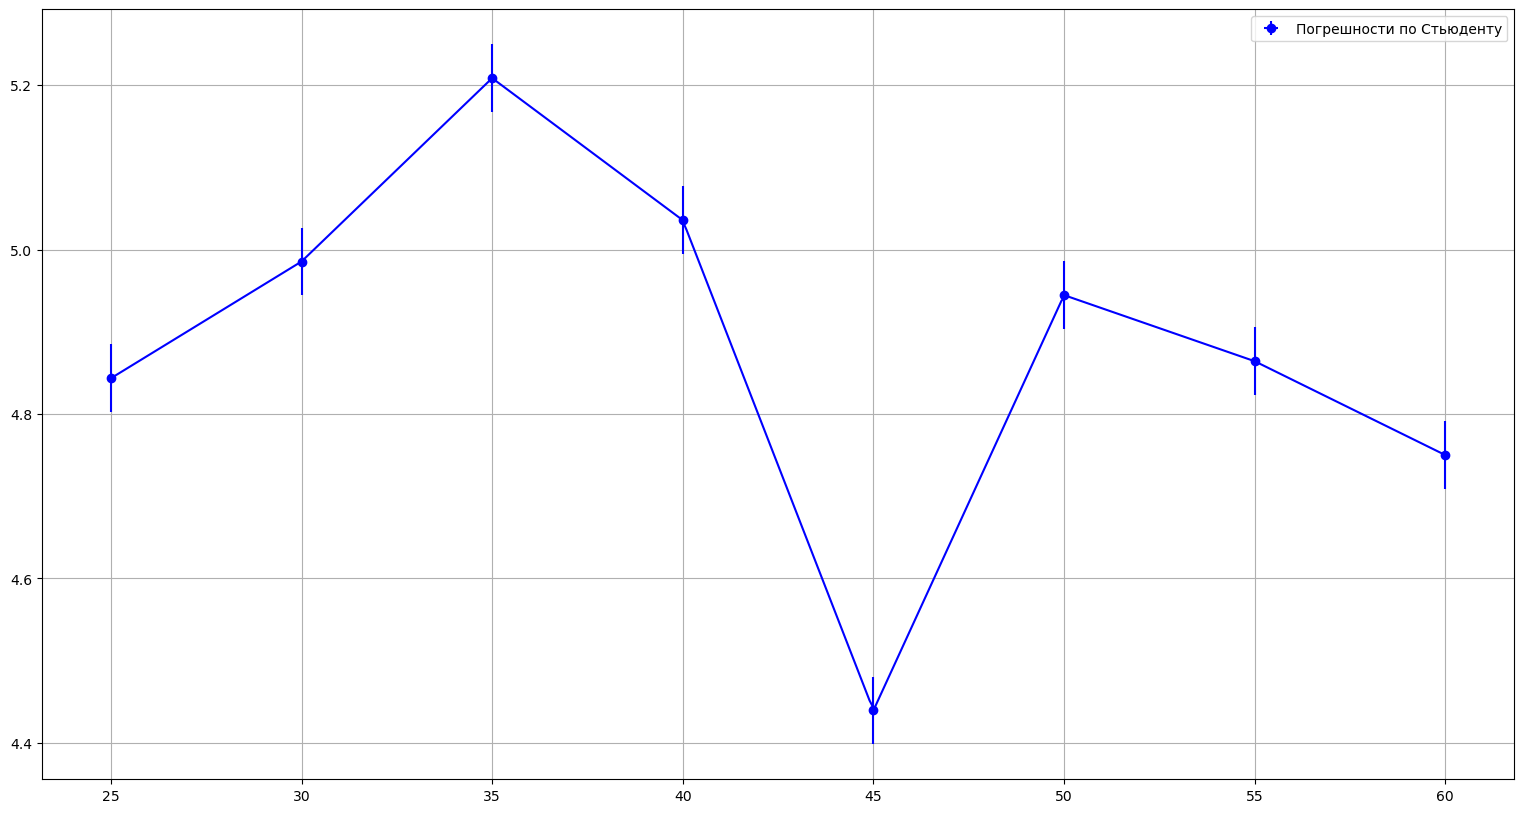

In [19]:
# Построение графика
plt.figure(figsize=(19, 10))
plt.plot(x_new, y_smooth, color = 'blue')
plt.errorbar(x, y, xerr = x_error, yerr=y_error, fmt='o', label='Погрешности по Стьюденту', color = 'blue')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_name)
plt.legend()
plt.grid(True)
plt.savefig("savedplots/lab5.14.png")
plt.show()

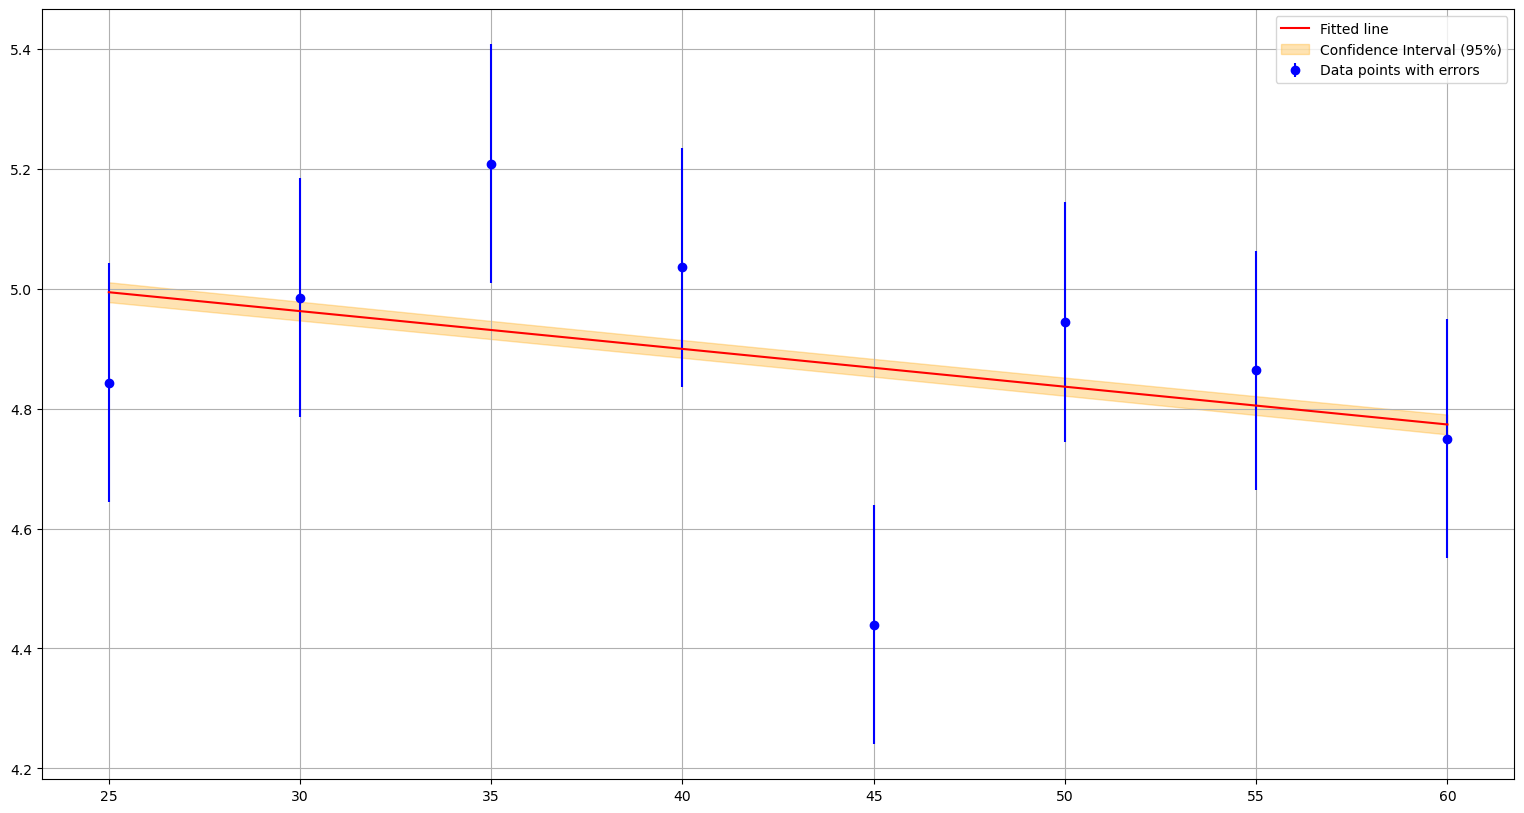

In [27]:
plt.figure(figsize=(19, 10))
# Определите ваши данные

# Выполните линейную регрессию
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Создайте уравнение прямой
y_pred = slope * x + intercept

# Рассчитайте остатки
residuals = y - y_pred

# Рассчитайте стандартное отклонение остатков
y_errors = np.std(residuals) * np.ones_like(y)  # используем одно и то же стандартное отклонение для всех точек

# Доверительные интервалы (по-прежнему нужны)
n = len(x)  # количество точек
pred_error = std_err * np.sqrt(1 + 1/n + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

# Доверительные интервалы
y_upper = y_pred + 1.96 * pred_error  # верхний доверительный интервал
y_lower = y_pred - 1.96 * pred_error  # нижний доверительный интервал

# Постройте результаты
plt.errorbar(x, y, yerr=y_errors, fmt='o', color='blue', label='Data points with errors')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.fill_between(x, y_lower, y_upper, color='orange', alpha=0.3, label='Confidence Interval (95%)')
plt.legend()
plt.grid(True)
plt.savefig("savedplots/lab5.14.png")
plt.show()